# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import groupby

df = pd.read_csv("Scorecard-Elements.csv")

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [3]:
# Dataframe work 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   7703 non-null   int64  
 1   UNITID                  7703 non-null   int64  
 2   OPEID                   7703 non-null   int64  
 3   OPEID6                  7703 non-null   int64  
 4   INSTNM                  7703 non-null   object 
 5   CITY                    7703 non-null   object 
 6   STABBR                  7703 non-null   object 
 7   INSTURL                 7626 non-null   object 
 8   NPCURL                  7158 non-null   object 
 9   UGDS                    6990 non-null   float64
 10  UGDS_WHITE              6990 non-null   float64
 11  UGDS_BLACK              6990 non-null   float64
 12  UGDS_HISP               6990 non-null   float64
 13  UGDS_ASIAN              6990 non-null   float64
 14  UGDS_AIAN               6990 non-null   

In [4]:
# show the first ten rows
df.head(10)

,index,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,INSTURL,NPCURL,UGDS,...,RET_PTL4,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GT_25K_P6,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP
0,0,100654,100200,1002,Alabama A & M University,Normal,AL,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,4206.0,...,NaN,0.8284,0.1049,30300,0.426,33888,347.7895079,0.23704563,NaN,0.324519626
1,1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,11383.0,...,NaN,0.5214,0.2422,39700,0.665,21941.5,225.1836487,0.500673552,NaN,0.546104802
2,2,100690,2503400,25034,Amridge University,Montgomery,AL,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,291.0,...,NaN,0.7795,0.8540,40100,0.676,23370,239.8442162,0.290488432,NaN,PrivacySuppressed
3,3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,www.uah.edu,finaid.uah.edu/,5451.0,...,NaN,0.4596,0.2640,45500,0.668,24097,247.3053521,0.527802295,NaN,0.472406496
4,4,100724,100500,1005,Alabama State University,Montgomery,AL,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,4811.0,...,NaN,0.7554,0.1270,26600,0.36,33118.5,339.8921984,0.185517462,NaN,0.257404961
5,5,100751,105100,1051,The University of Alabama,Tuscaloosa,AL,www.ua.edu/,financialaid.ua.edu/net-price-calculator/,29851.0,...,NaN,0.4010,0.0853,41900,0.67,23750,243.7441222,0.572611653,NaN,0.66125081
6,6,100760,100700,1007,Central Alabama Community College,Alexander City,AL,www.cacc.edu,www.cacc.edu/clientuploads/financial_aid/NetPr...,1592.0,...,0.5055,0.3977,0.3153,27500,0.459,16127,165.5099562,0.266956522,0.115155377,NaN
7,7,100812,100800,1008,Athens State University,Athens,AL,www.athens.edu,https://24.athens.edu/apex/prod8/f?p=174:1:394...,2991.0,...,NaN,0.6296,0.6410,39000,0.666,18595,190.838819,0.476363636,NaN,NaN
8,8,100830,831000,8310,Auburn University at Montgomery,Montgomery,AL,www.aum.edu,www.aum.edu/admissions/financial-information/p...,4304.0,...,NaN,0.5803,0.2930,35000,0.575,21335,218.9591936,0.408952959,NaN,0.241364395
9,9,100858,100900,1009,Auburn University,Auburn,AL,www.auburn.edu,www.auburn.edu/admissions/money-matters.html,20514.0,...,NaN,0.3494,0.0415,45700,0.725,21831,224.0495971,0.724353955,NaN,0.693542081


In [5]:
# check how many rows and columns 
df.shape

(7703, 33)

In [6]:
# view column names
df.columns

Index(['index', 'UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR',
       'INSTURL', 'NPCURL', 'UGDS', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP',
       'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA',
       'UGDS_UNKN', 'PCTPELL', 'RET_FT4', 'RET_FTL4', 'RET_PT4', 'RET_PTL4',
       'PCTFLOAN', 'UG25ABV', 'MD_EARN_WNE_P10', 'GT_25K_P6',
       'GRAD_DEBT_MDN_SUPP', 'GRAD_DEBT_MDN10YR_SUPP', 'RPY_3YR_RT_SUPP',
       'C150_L4_POOLED_SUPP', 'C150_4_POOLED_SUPP'],
      dtype='object')

In [7]:
# view null counts
df.isnull().sum()

index                        0
UNITID                       0
OPEID                        0
OPEID6                       0
INSTNM                       0
CITY                         0
STABBR                       0
INSTURL                     77
NPCURL                     545
UGDS                       713
UGDS_WHITE                 713
UGDS_BLACK                 713
UGDS_HISP                  713
UGDS_ASIAN                 713
UGDS_AIAN                  713
UGDS_NHPI                  713
UGDS_2MOR                  713
UGDS_NRA                   713
UGDS_UNKN                  713
PCTPELL                    737
RET_FT4                   5410
RET_FTL4                  3860
RET_PT4                   6291
RET_PTL4                  5495
PCTFLOAN                   737
UG25ABV                    875
MD_EARN_WNE_P10           1169
GT_25K_P6                 1169
GRAD_DEBT_MDN_SUPP          32
GRAD_DEBT_MDN10YR_SUPP      32
RPY_3YR_RT_SUPP            902
C150_L4_POOLED_SUPP       3731
C150_4_P

In [8]:
#Looking at statistical summart of values 
df.describe()

,index,UNITID,OPEID,OPEID6,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PCTPELL,RET_FT4,RET_FTL4,RET_PT4,RET_PTL4,PCTFLOAN,UG25ABV
count,7703.000000,7.703000e+03,7.703000e+03,7703.000000,6990.000000,6990.000000,6990.000000,6990.000000,6990.000000,6990.000000,...,6990.000000,6990.000000,6990.000000,6966.000000,2293.000000,3843.000000,1412.000000,2208.000000,6966.000000,6828.000000
mean,3851.000000,1.663052e+06,1.891630e+06,16293.906530,2332.158941,0.509885,0.189942,0.162111,0.033829,0.013710,...,0.023887,0.015992,0.045094,0.532093,0.707081,0.686155,0.455639,0.564679,0.523092,0.411543
std,2223.808895,6.566910e+06,3.383134e+06,13883.577507,5438.848301,0.287322,0.224705,0.222598,0.075194,0.069653,...,0.031185,0.049923,0.093322,0.225941,0.195645,0.180121,0.293325,0.263540,0.284088,0.229097
min,0.000000,1.006540e+05,1.002000e+05,1002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1925.500000,1.742420e+05,3.440500e+05,3436.500000,116.000000,0.266700,0.035925,0.027600,0.002400,0.000000,...,0.000000,0.000000,0.000000,0.358850,0.618200,0.567900,0.250000,0.382925,0.333300,0.242800
50%,3851.000000,2.304720e+05,1.054211e+06,10490.000000,406.000000,0.556000,0.100000,0.071700,0.012700,0.002600,...,0.017500,0.000000,0.014200,0.523300,0.741400,0.690600,0.450000,0.503250,0.584900,0.403750
75%,5776.500000,4.476520e+05,2.811950e+06,25988.000000,1890.000000,0.747400,0.256750,0.200000,0.032600,0.007400,...,0.033800,0.011600,0.045475,0.714300,0.833300,0.815750,0.636400,0.789500,0.747325,0.576400
max,7702.000000,4.841450e+07,8.209882e+07,42371.000000,151558.000000,1.000000,1.000000,1.000000,0.972700,1.000000,...,0.533300,0.928600,0.902700,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Reviewing the number of unique entries
df.nunique()

index                     7703
UNITID                    7703
OPEID                     7674
OPEID6                    5662
INSTNM                    7535
CITY                      2542
STABBR                      59
INSTURL                   6142
NPCURL                    5435
UGDS                      2951
UGDS_WHITE                4439
UGDS_BLACK                3262
UGDS_HISP                 2836
UGDS_ASIAN                1262
UGDS_AIAN                  605
UGDS_NHPI                  365
UGDS_2MOR                  962
UGDS_NRA                   924
UGDS_UNKN                 1531
PCTPELL                   4458
RET_FT4                   1505
RET_FTL4                  1712
RET_PT4                    389
RET_PTL4                  1009
PCTFLOAN                  4200
UG25ABV                   4326
MD_EARN_WNE_P10            598
GT_25K_P6                  816
GRAD_DEBT_MDN_SUPP        2060
GRAD_DEBT_MDN10YR_SUPP    2060
RPY_3YR_RT_SUPP           3962
C150_L4_POOLED_SUPP       3742
C150_4_P

In [10]:
#Reviewing how many Missouri universities contain entries
df['STABBR'].value_counts()['MO']

200

In [11]:
#Reviewing the value counts for Grad debt specifically
df['GRAD_DEBT_MDN_SUPP'].value_counts()

PrivacySuppressed    1545
9500                  536
27000                 315
25827.5               142
25000                 125
                     ... 
12400                   1
8443.5                  1
9604                    1
19262                   1
11061                   1
Name: GRAD_DEBT_MDN_SUPP, Length: 2060, dtype: int64

In [12]:
#Reviwing earnings of students post-graduation
df['MD_EARN_WNE_P10'].value_counts()

PrivacySuppressed    841
38800                157
21500                 97
49200                 78
27400                 46
                    ... 
84000                  1
66900                  1
52800                  1
67800                  1
186500                 1
Name: MD_EARN_WNE_P10, Length: 598, dtype: int64

In [14]:
#Reviewing MO stats
df.groupby(["STABBR"]).count()

,index,UNITID,OPEID,OPEID6,INSTNM,CITY,INSTURL,NPCURL,UGDS,UGDS_WHITE,...,RET_PTL4,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GT_25K_P6,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
AK,10,10,10,10,10,10,10,10,10,10,...,3,10,10,8,8,10,10,9,4,5
AL,97,97,97,97,97,97,97,89,90,90,...,28,90,89,86,86,97,97,76,44,41
AR,89,89,89,89,89,89,88,81,83,83,...,36,83,81,82,82,89,89,80,55,24
AS,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,0,0,1
AZ,134,134,134,134,134,134,134,133,127,127,...,40,126,123,108,108,134,134,126,79,37
CA,795,795,795,795,795,795,795,692,663,663,...,236,658,645,610,610,793,793,692,430,170
CO,129,129,129,129,129,129,129,124,120,120,...,35,120,119,101,101,128,128,122,70,40
CT,102,102,102,102,102,102,101,91,89,89,...,33,89,88,90,90,101,101,86,55,29
DC,26,26,26,26,26,26,26,23,18,18,...,1,18,17,18,18,26,26,22,5,12


In [19]:
df_MO= df[(df['STABBR']== 'MO')]
print(df_MO)

      index    UNITID     OPEID  OPEID6  \
1361   1361    155283   2361600   23616   
2007   2007    176600    163200    1632   
2008   2008    176619    246302    2463   
2009   2009    176628    244900    2449   
2010   2010    176637    732923    7329   
...     ...       ...       ...     ...   
7098   7098    482352    405735    4057   
7102   7102    482398   4051343   40513   
7114   7114    482538   1072717   10727   
7238   7238    484701  32098887   20988   
7432   7432  15336601    186601    1866   

                                          INSTNM           CITY STABBR  \
1361         Concorde Career College-Kansas City    Kansas City     MO   
2007               Aquinas Institute of Theology    Saint Louis     MO   
2008      Assemblies of God Theological Seminary    Springfield     MO   
2009                            Avila University    Kansas City     MO   
2010          ITT Technical Institute-Earth City     Earth City     MO   
...                                    

In [25]:
df_MO.groupby(["CITY"]).count()

,index,UNITID,OPEID,OPEID6,INSTNM,STABBR,INSTURL,NPCURL,UGDS,UGDS_WHITE,...,RET_PTL4,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GT_25K_P6,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP
CITY,,,,,,,,,,,,,,,,,,,,,
Arnold,2,2,2,2,2,2,2,2,2,2,...,0,2,2,2,2,2,2,2,1,1
Berkeley,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,0,1
Blue Springs,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,0
Bolivar,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,0,1
Brentwood,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Waynesville,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,0
Webb City,1,1,1,1,1,1,1,1,1,1,...,0,1,1,0,0,1,1,0,1,0
Webster Groves,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,1,1,1,0,0


In [20]:
df_SaintLouis= df[(df['CITY']== 'Saint Louis')]
print(df_SaintLouis)

      index  UNITID     OPEID  OPEID6  \
2007   2007  176600    163200    1632   
2025   2025  177092    245700    2457   
2027   2027  177126    470700    4707   
2033   2033  177287   2564700   25647   
2036   2036  177418    246400    2464   
2041   2041  177551    246600    2466   
2042   2042  177579   1027900   10279   
2047   2047  177719    638900    6389   
2049   2049  177816    247600    2476   
2058   2058  178004    666600    6666   
2059   2059  178059    248200    2482   
2066   2066  178244    754000    7540   
2077   2077  178420    251900    2519   
2080   2080  178484    952000    9520   
2088   2088  178767    855200    8552   
2090   2090  178891   1250000   12500   
2095   2095  179159    250600    2506   
2101   2101  179265    250400    2504   
2102   2102  179308    247100    2471   
2107   2107  179511   2340500   23405   
2116   2116  179867    252000    2520   
2117   2117  179894    252100    2521   
5017   5017  419271   3097600   30976   
6595   6595  460

In [22]:
df_SaintLouis.nunique()

index                     25
UNITID                    25
OPEID                     25
OPEID6                    25
INSTNM                    25
CITY                       1
STABBR                     1
INSTURL                   25
NPCURL                    24
UGDS                      22
UGDS_WHITE                22
UGDS_BLACK                22
UGDS_HISP                 20
UGDS_ASIAN                20
UGDS_AIAN                 16
UGDS_NHPI                  9
UGDS_2MOR                 18
UGDS_NRA                  13
UGDS_UNKN                 18
PCTPELL                   21
RET_FT4                   12
RET_FTL4                   7
RET_PT4                    8
RET_PTL4                   3
PCTFLOAN                  21
UG25ABV                   21
MD_EARN_WNE_P10           19
GT_25K_P6                 19
GRAD_DEBT_MDN_SUPP        20
GRAD_DEBT_MDN10YR_SUPP    20
RPY_3YR_RT_SUPP           21
C150_L4_POOLED_SUPP        7
C150_4_POOLED_SUPP        14
dtype: int64

In [47]:
df_SaintLouis['UGDS'].sum()
#The totle number of undergraduates from the institutions in St. Louis


58788.0

In [66]:
df['UGDS'].sum()

16301791.0

In [81]:
a = df['UGDS_WHITE'].mean()
print(round (a,4))
#This information will be used for a pie chart to visualize the data below
#Also I rounded to the nearest hundreth for the pie chart
#This shows the number of 

0.5099


In [82]:
b = df['UGDS_BLACK'].mean()
print(round (b,4))

0.1899


In [83]:
c = df['UGDS_HISP'].mean()
print (round (c,4))

0.1621


In [84]:
d = df['UGDS_ASIAN'].mean()
print (round (d,4))

0.0338


In [85]:
e = df['UGDS_AIAN'].mean()
print (round (e,4))

0.0137


In [86]:
f = df['UGDS_NHPI'].mean()
print (round (f,4))

0.0045


In [87]:
g = df['UGDS_2MOR'].mean()
print (round (g,4))

0.0239


In [88]:
h = df['UGDS_UNKN'].mean()
print (round (h,4))

0.0451


In [89]:
i = df['UGDS_NRA'].mean()
print (round (i,4))

0.016


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

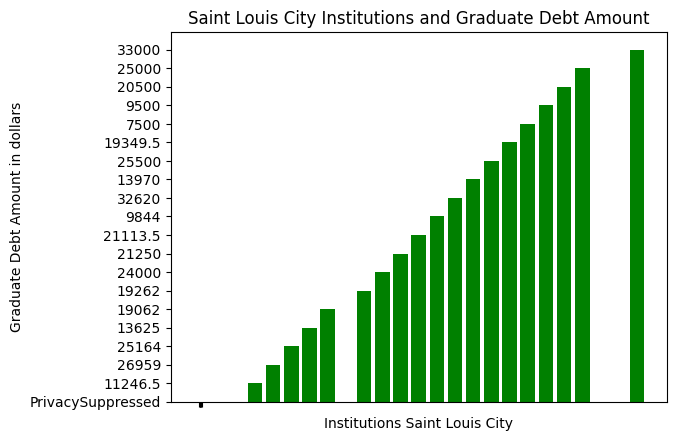

In [32]:
df_SaintLouis.value_counts().plot();
#Creating the bar graph for Undergraduates and Grad Debt in Saint Louis
plt.bar(df_SaintLouis['INSTNM'],df_SaintLouis['GRAD_DEBT_MDN_SUPP'], color = "green" )
#Adding the aesthetics
plt.title('Saint Louis City Institutions and Graduate Debt Amount')
plt.xlabel('Institutions Saint Louis City')
plt.ylabel('Graduate Debt Amount in dollars') 
#Show the plot
plt.show()

#Above shows that there are 25 institutions listed. In Tableau I can create a chart to the side that will highlight the institutions names since it looks like they won't fit at the bottom of the chart
# show the distribution of state universities

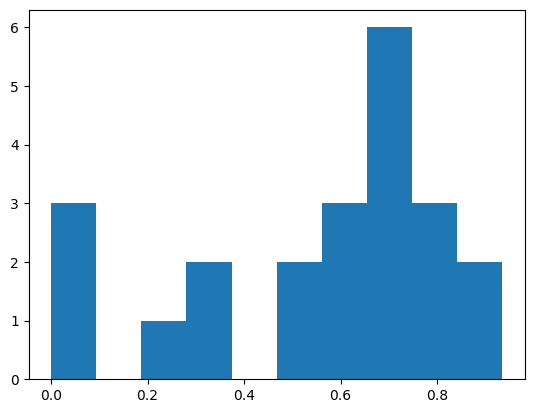

In [36]:
a = df_SaintLouis[('UGDS_WHITE')]
plt.hist(a)
plt.show() 
#Reviewing the number of white undergraduates in Saint Louis university
#I feel like this doesn't tell me much, though, I am going to do a comparison of races to get a better understanding

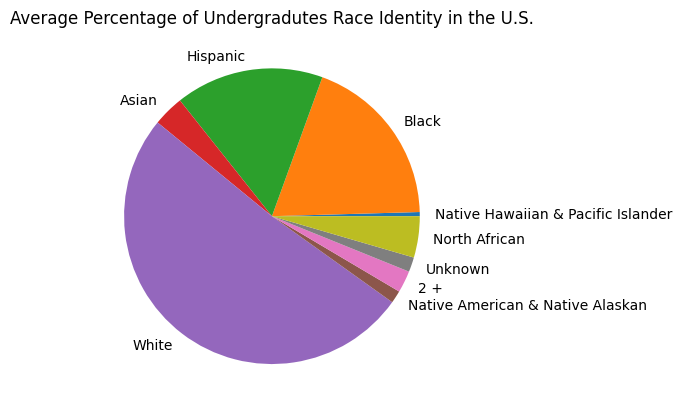

In [101]:
y = np.array([0.45, 18.99, 16.21, 3.38, 50.99, 1.37, 2.39, 1.60, 4.51])
mylabels = np.array (["Native Hawaiian & Pacific Islander", "Black", "Hispanic", "Asian", "White", "Native American & Native Alaskan", "2 +", "Unknown", "North African"])

plt.pie(y, labels = mylabels)
plt.title('Average Percentage of Undergradutes Race Identity in the U.S.')
plt.show() 

# I chose a pie chart because it is the visually most captures the discrepency of White undergraduates compared to other races.



## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? I was surprised that there were 200 MO universities listed. Also, I was suprised about the number of "PrivacySuppressed" data in the dataset. Also, a lot of my data was too large to run. Once I clean up the data, I will be able to run more graphs/charts.
2. Do you have any concerns about your dataset? I'm concerned about grouping the dataset since it is so large. There is a lot of information contained in the document. Right now, I feel like I need to delete several columns. Also because it is so large, I may want to focus on either just MO colleges and universities or just Saint Louis. 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? I am going to group the MO schools. The dataset, I want to review the columns state abb., school name, graduate earnings, race, and loan debt.